# <font color="red">B0:Cài đặt thư viện và import </font>
- pip install pandas <br>
- pip install numpy <br>
- pip install matplotlib <br>
- pip install scikit-learn (sklearn) <br>
- pip install pickle (nếu lỗi version thì pip install pickle5) <br>
- pip install yfinance (data về chứng khoán) <br>

In [75]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# <font color="red">B1:Đọc DATA và khám phá dữ liệu ( Công ty Google) </font>

In [76]:
# Ticker symbol của cổ phiếu bạn muốn dự đoán
ticker_symbol = 'GOOGL'

# Lấy dữ liệu lịch sử giá cổ phiếu
stock_data = yf.download(ticker_symbol, start='2003-10-20', end='2023-10-20')


[*********************100%%**********************]  1 of 1 completed


In [77]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...
2023-10-13,139.380005,140.000000,136.619995,137.360001,137.360001,23420500
2023-10-16,138.169998,139.630005,137.990005,139.100006,139.100006,28501900
2023-10-17,138.630005,139.899994,137.179993,139.720001,139.720001,23515800


In [78]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4826 entries, 2004-08-19 to 2023-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4826 non-null   float64
 1   High       4826 non-null   float64
 2   Low        4826 non-null   float64
 3   Close      4826 non-null   float64
 4   Adj Close  4826 non-null   float64
 5   Volume     4826 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 263.9 KB


In [79]:
stock_data.keys()
# Những feature của tập dữ liệu

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [80]:
stock_data.describe()
# Thống kê mô tả về tập dữ liệu

,Open,High,Low,Close,Adj Close,Volume
count,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4.826000e+03
mean,40.977575,41.409022,40.546866,40.986860,40.986860,1.210726e+08
std,37.710560,38.140725,37.300075,37.727800,37.727800,1.497356e+08
min,2.482232,2.546046,2.401401,2.502753,2.502753,9.312000e+06
25%,12.863488,13.004316,12.744244,12.876314,12.876314,3.198700e+07
50%,26.897500,27.117500,26.649250,26.911500,26.911500,6.537656e+07
75%,57.189502,57.669875,56.611250,57.264874,57.264874,1.468140e+08
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.643023e+09


# <font color="red">B2:Kiểm tra và tiền xử lý dữ liệu(nếu có) </font>

In [81]:
stock_data.shape
# kích thước dữ liệu

(4826, 6)

In [82]:
stock_data.dtypes
#Kiểu dữ liệu của từng feature

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [83]:
stock_data.isnull().sum()
#check missing value

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### <font color = 'yellow' >Ta thấy tập dữ liệu này khá là sạch<font>

### Vẽ biểu đồ phân tích

1: Biểu đồ cột

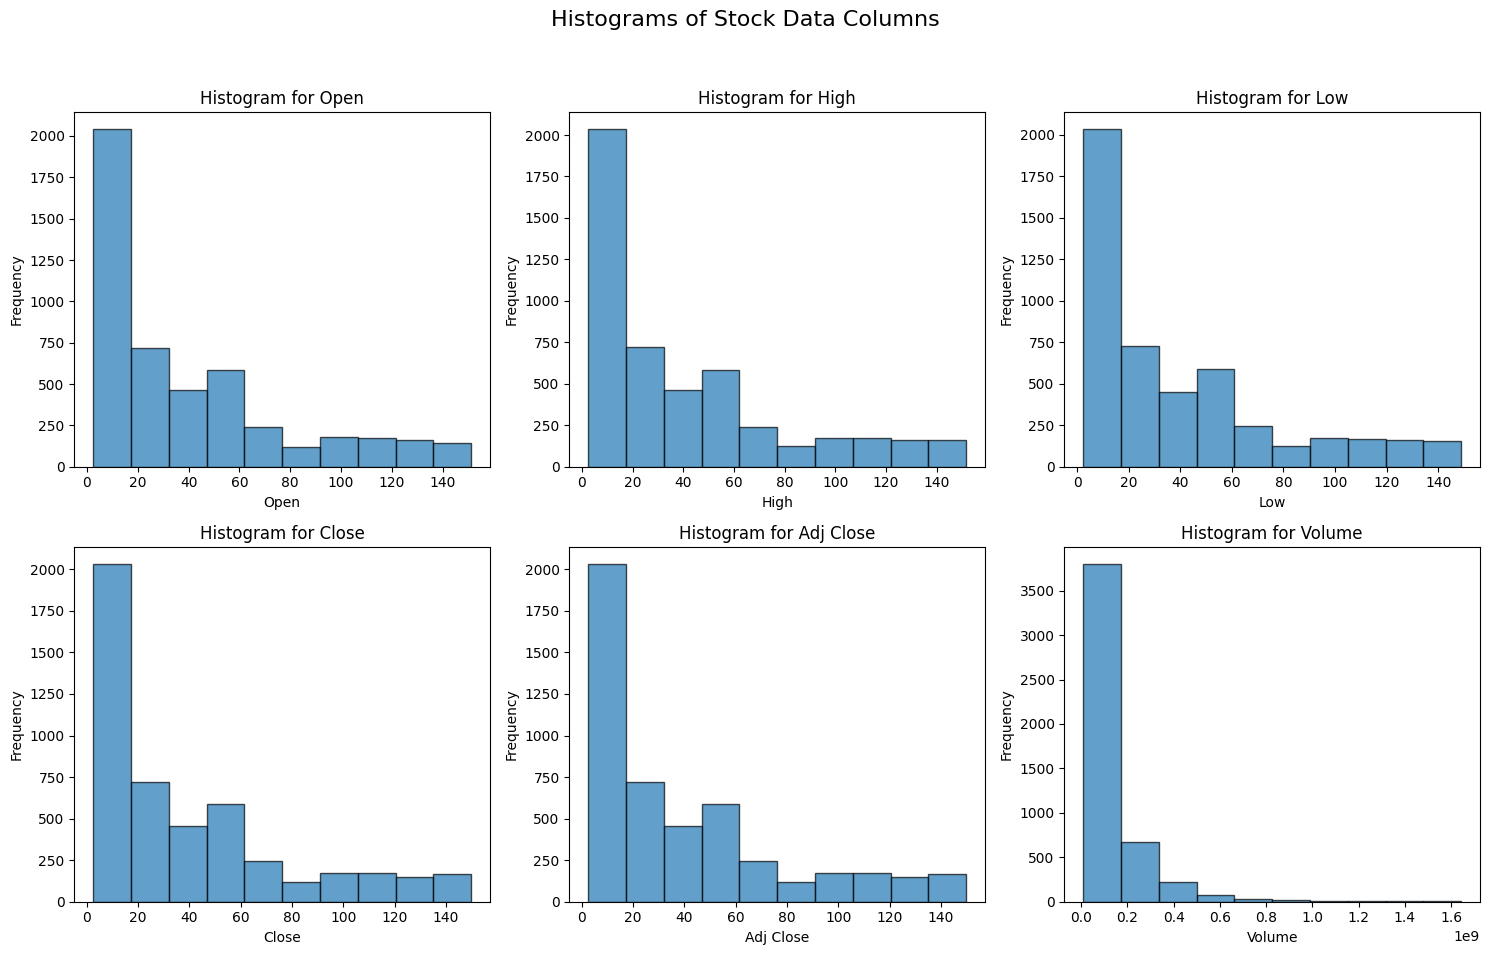

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle('Histograms of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ histogram
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].hist(stock_data[column], bins=10, edgecolor='k', alpha=0.7)
    axs[row, col].set_title(f'Histogram for {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()


Biểu đồ hộp

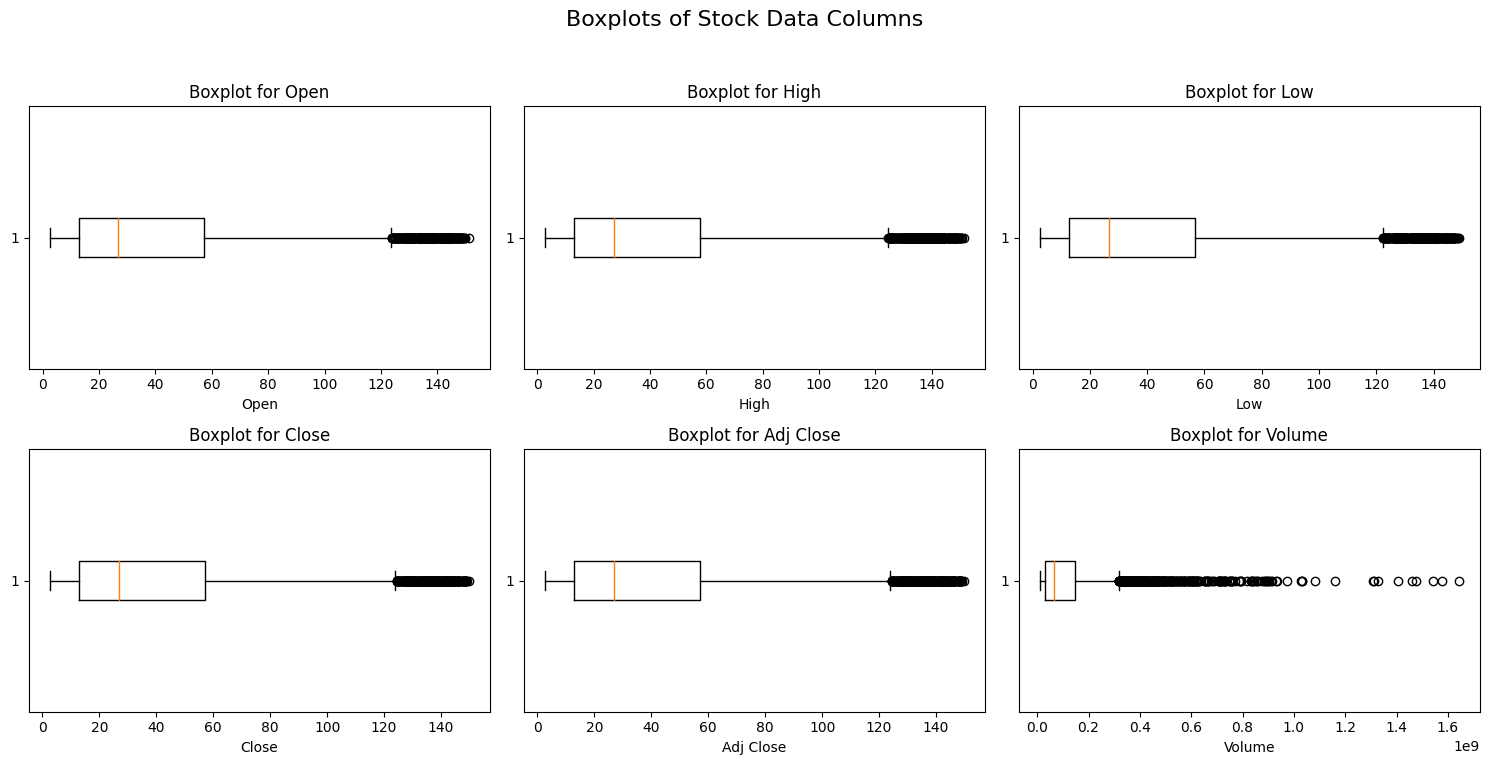

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Boxplots of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ boxplot
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].boxplot(stock_data[column], vert=False)
    axs[row, col].set_title(f'Boxplot for {column}')
    axs[row, col].set_xlabel(column)

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()


Biểu đồ heatmap

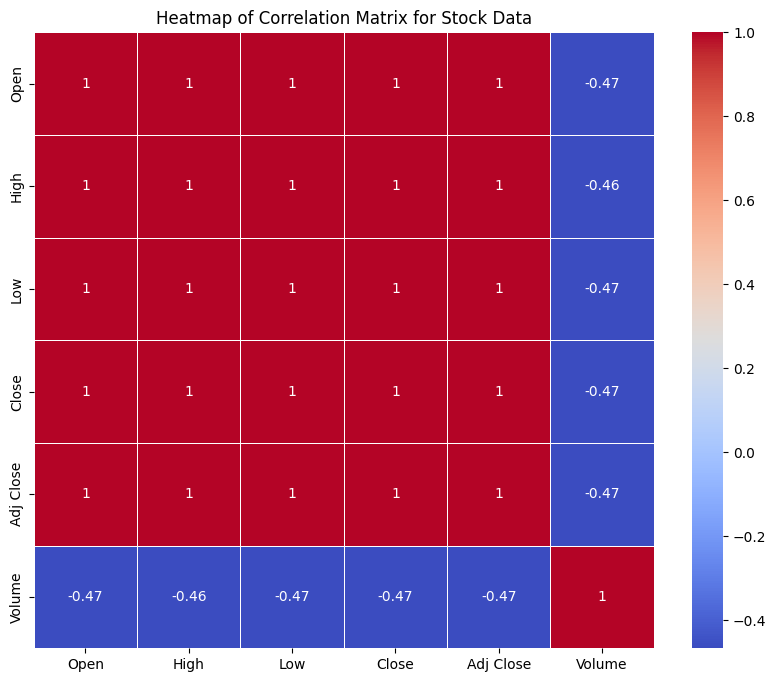

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và seaborn và đã có dữ liệu

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Stock Data')
plt.show()


Biểu đồ scatter thể hiện sự tuyến tính giữa từng cột với cột adj close

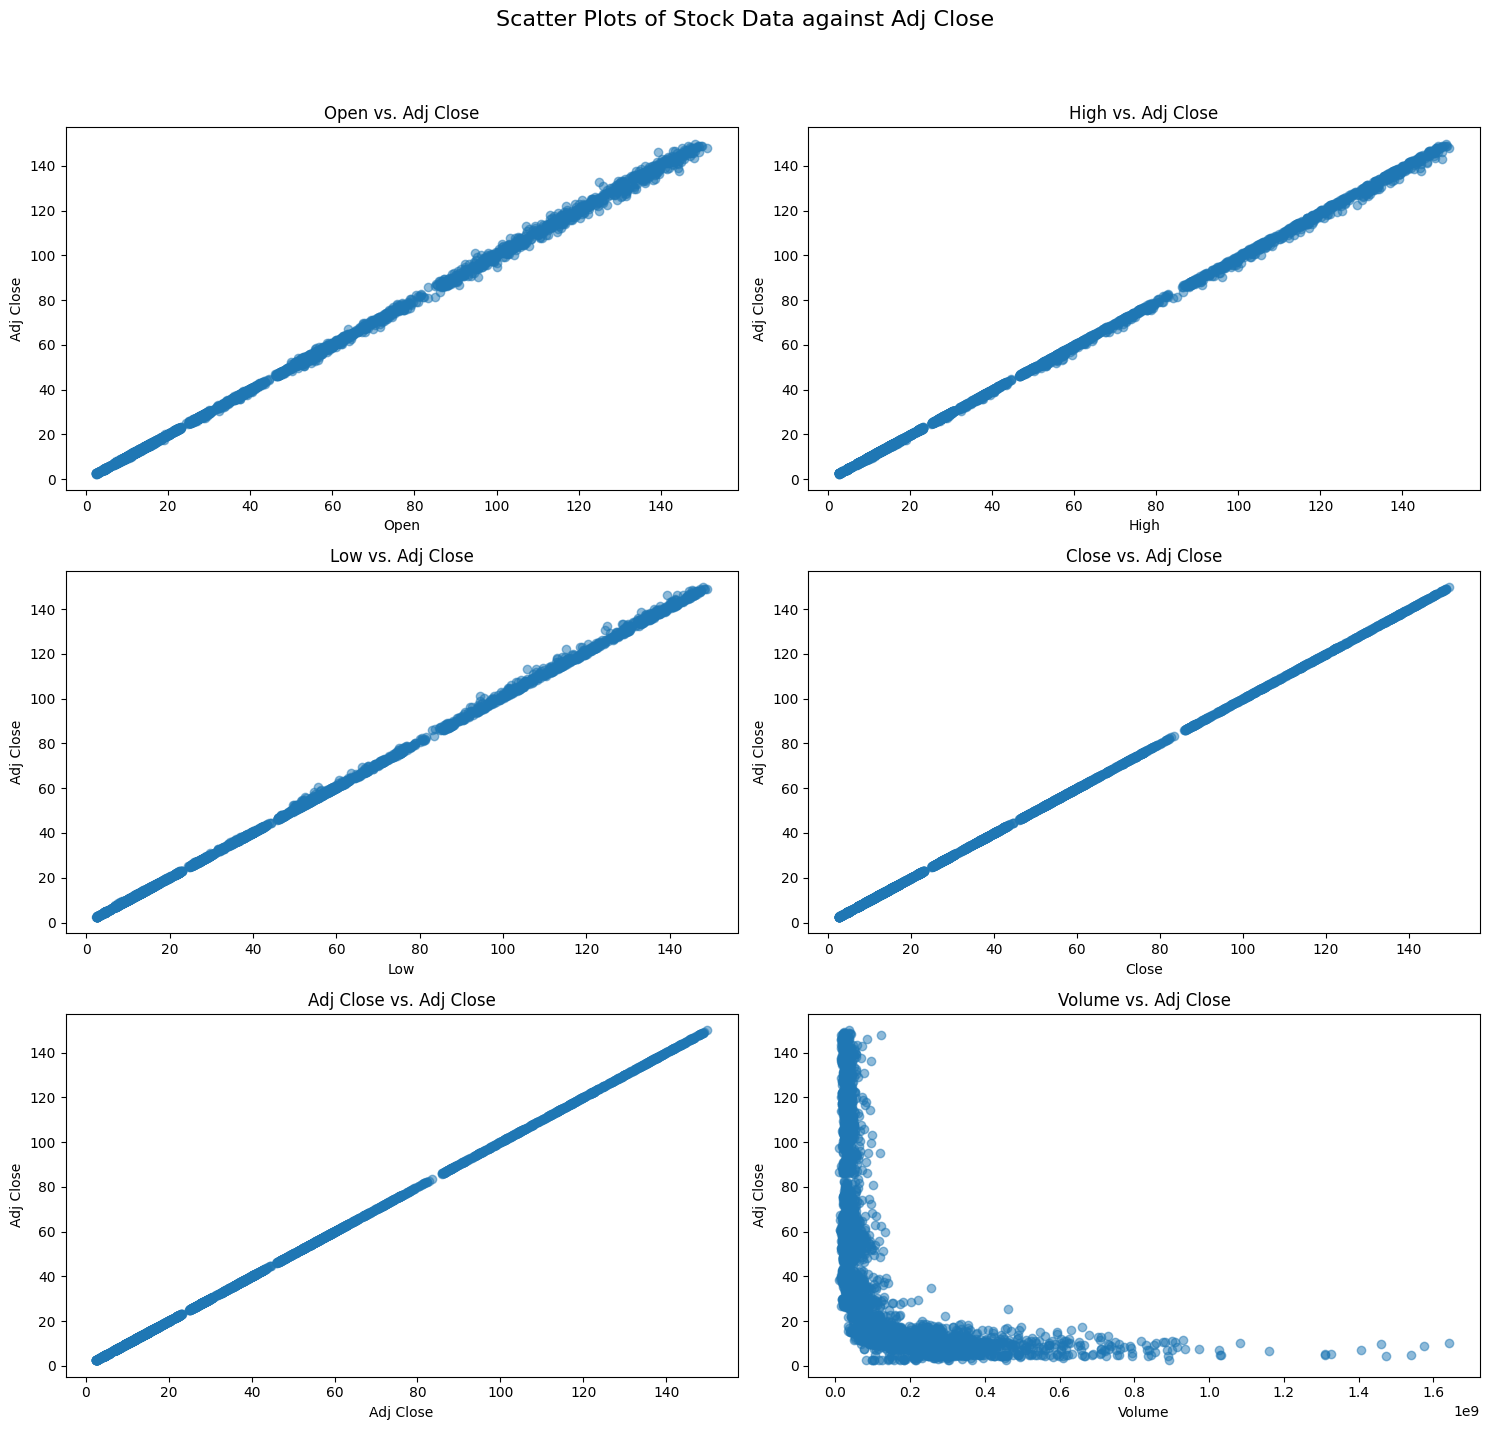

In [87]:

# Tính toán số lượng cột và số lượng hàng dựa vào số cột trong DataFrame
num_cols = len(stock_data.columns)
num_rows = (num_cols + 1) // 2  # Số hàng làm tròn lên nếu có số lẻ cột

# Tạo subplot
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
fig.suptitle('Scatter Plots of Stock Data against Adj Close', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ scatter
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 2)
    axs[row, col].scatter(stock_data[column], stock_data['Adj Close'], alpha=0.5)
    axs[row, col].set_title(f'{column} vs. Adj Close')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Adj Close')

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### <font color = 'yellow' >Thông qua biểu đồ heatmap và biểu đồ scatter, ta thấy sự phụ thuộc tuyến tính giữa cột Adj close với các cột Open, hight, low, close. <br>Vì thế nên ta sẽ chia tập X, y như sau <font>

In [88]:
# Chọn cột 'Adj Close' (giá đóng cửa đã điều chỉnh) làm biến phụ thuộc (y)
y = stock_data['Adj Close']
y

Date
2004-08-19      2.511011
2004-08-20      2.710460
2004-08-23      2.737738
2004-08-24      2.624374
2004-08-25      2.652653
                 ...    
2023-10-13    137.360001
2023-10-16    139.100006
2023-10-17    139.720001
2023-10-18    137.960007
2023-10-19    137.750000
Name: Adj Close, Length: 4826, dtype: float64

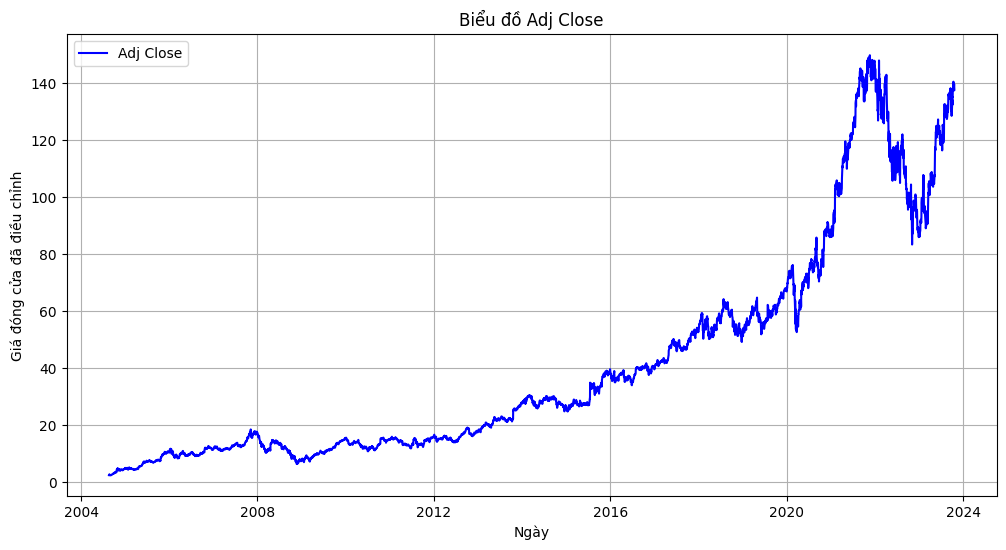

In [89]:
# Vẽ biểu đồ đường cho cột 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, y, label='Adj Close', color='blue')
plt.title('Biểu đồ Adj Close')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa đã điều chỉnh')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
# Chọn các cột trừ cột 'Adj Close' và 'Volume làm biến độc lập (x)
X = stock_data.drop(columns=['Adj Close','Volume'])
X

,Open,High,Low,Close
Date,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011
2004-08-20,2.527778,2.729730,2.515015,2.710460
2004-08-23,2.771522,2.839840,2.728979,2.737738
2004-08-24,2.783784,2.792793,2.591842,2.624374
2004-08-25,2.626627,2.702703,2.599600,2.652653
...,...,...,...,...
2023-10-13,139.380005,140.000000,136.619995,137.360001
2023-10-16,138.169998,139.630005,137.990005,139.100006
2023-10-17,138.630005,139.899994,137.179993,139.720001


### <font color = 'yellow' >Thay vì sử dụng chỉ số( index) là số thứ tự thì ta sẽ dùng ngày tháng. Do ko ảnh hưởng đến việc huấn luyện nên ta không cần chuyển về dạng số thứ tự<font>

In [91]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#kiểm tra độ lớn của dữ liệu sau khi chia

(3860, 4)
(966, 4)
(3860,)
(966,)


In [93]:
X_train

,Open,High,Low,Close
Date,,,,
2020-12-04,91.011002,91.474998,90.679497,91.188004
2015-03-26,28.232500,28.359501,27.915501,28.181999
2006-10-03,10.042292,10.171672,9.964715,10.111111
2015-01-07,25.547501,25.574499,25.182501,25.257500
2005-05-18,5.846096,6.005255,5.843844,5.984985
...,...,...,...,...
2022-03-18,133.424500,136.244003,132.258499,136.125504
2006-06-26,10.178929,10.217718,10.091341,10.115616
2016-11-29,39.418999,39.821999,39.266998,39.472000


In [94]:
X_test

,Open,High,Low,Close
Date,,,,
2006-12-19,11.554555,11.744494,11.473974,11.727477
2011-01-21,16.005507,16.059309,15.299299,15.311061
2008-04-09,11.739990,11.811812,11.449950,11.616366
2011-08-26,13.012763,13.274525,12.841341,13.184685
2022-12-09,93.769997,94.260002,92.750000,92.830002
...,...,...,...,...
2020-10-20,76.155502,78.692001,76.025002,77.554001
2006-05-08,9.887638,9.937938,9.761011,9.879379
2012-06-07,14.704705,14.711962,14.445696,14.470220


In [95]:
y_train

Date
2020-12-04     91.188004
2015-03-26     28.181999
2006-10-03     10.111111
2015-01-07     25.257500
2005-05-18      5.984985
                 ...    
2022-03-18    136.125504
2006-06-26     10.115616
2016-11-29     39.472000
2019-08-14     58.212502
2008-01-18     15.021271
Name: Adj Close, Length: 3860, dtype: float64

In [96]:
y_test

Date
2006-12-19    11.727477
2011-01-21    15.311061
2008-04-09    11.616366
2011-08-26    13.184685
2022-12-09    92.830002
                ...    
2020-10-20    77.554001
2006-05-08     9.879379
2012-06-07    14.470220
2005-10-11     7.660160
2014-11-03    28.188499
Name: Adj Close, Length: 966, dtype: float64

### <font color = 'yellow' >Ta hãy lưu mô hình chuẩn hóa sau vào 1 file, để sau này chúng ta sẽ chuẩn hóa dữ liệu nhập vào theo file này( lưu chuẩn hóa của X vì dữ liệu chúng ta nhập vào là tập dữ liệu X, tức đầu vào)<font>

In [97]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
import pickle
with open("../Scaler_data/Scaler_Google.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)
X_test = minmax_scale.transform(X_test)

In [98]:
X_train, X_train.shape

(array([[0.60083554, 0.60059146, 0.60452402, 0.60192622],
        [0.17476439, 0.17433401, 0.17471929, 0.17429067],
        [0.05130934, 0.0515005 , 0.0517932 , 0.05163959],
        ...,
        [0.25068599, 0.25174724, 0.25245378, 0.25091838],
        [0.38224659, 0.38221011, 0.38110282, 0.37811427],
        [0.08647857, 0.08589895, 0.08611178, 0.08496592]]),
 (3860, 4))

In [99]:
X_test,X_test.shape

(array([[0.06157291, 0.06212273, 0.06212853, 0.06261022],
        [0.09178106, 0.09126331, 0.08832417, 0.08693279],
        [0.06283144, 0.06257737, 0.06196402, 0.06185609],
        ...,
        [0.08295265, 0.08216385, 0.08247873, 0.08122582],
        [0.03590805, 0.03564574, 0.03579922, 0.03500445],
        [0.17438432, 0.17432049, 0.17585604, 0.17433479]]),
 (966, 4))

# <font color = 'red'>3:Huấn luyện mô hình<font>

In [100]:
# Mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train) # fit chính là hàm đào tạo

LinearRegression()

# <font color="red">4:Đánh giá mô hình</font>

In [101]:
from sklearn.metrics import mean_squared_error, r2_score
#mean_squared_error càng thấp(về 0) càng tốt
#r2_score càng cao càng tốt

In [102]:
y_pred = model.predict(X_test) #dự báo y_pred dựa trên tập x_test
y_pred_train = model.predict(X_train)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate(y_test, y_pred,y_train,y_pred_train):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2) Score:", r2_train)

    print('--------Kết quả thẩm định-------')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)

In [103]:
y_pred.shape

(966,)

In [104]:
y_test.shape

(966,)

In [105]:
rate(y_test, y_pred,y_train,y_pred_train)

--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 6.443521123421957e-28
R-squared (R2) Score: 1.0
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 6.355391327878117e-28
R-squared (R2) Score: 1.0


In [106]:
print(y_test)

Date
2006-12-19    11.727477
2011-01-21    15.311061
2008-04-09    11.616366
2011-08-26    13.184685
2022-12-09    92.830002
                ...    
2020-10-20    77.554001
2006-05-08     9.879379
2012-06-07    14.470220
2005-10-11     7.660160
2014-11-03    28.188499
Name: Adj Close, Length: 966, dtype: float64


In [107]:
print(y_pred)

[ 11.72747707  15.31106091  11.61636639  13.18468475  92.83000183
  94.62799835  15.80955982  10.37262344 119.51000214 113.91750336
  36.68099976   9.46396446  57.0644989  101.2365036   86.19999695
   9.77202225  13.87712669  27.29450035  27.22550011  56.02700043
   7.72197199   2.56181192 107.51000214  41.92549896  52.72900009
   9.86411381 111.77749634  25.29649925  17.59784889  61.40000153
  53.76549911  11.98999023  13.38738728  11.61336327  25.20050049
 138.66949463   4.39439392  37.9734993  102.72200012   9.491992
  10.13163185  11.78979015  33.5          2.96246195  89.87000275
  25.81456566  16.72947884  11.76201153  38.08000183 142.97149658
  26.45599937  14.0405407   47.42250061   8.10485458   7.01351404
   4.84334278  76.7559967   15.57857895   6.56731701  55.32500076
  88.05400085  29.43149948  12.91341305  15.51826763  62.15000153
 117.30000305 107.33999634  26.45996094  38.21649933  15.25925922
  29.62100029  15.214715    38.04000092  18.56331253  56.79850006
   7.7552552

In [108]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df_compare = df_result.head(10)
df_compare
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
Date,,
2006-12-19,11.727477,11.727477
2011-01-21,15.311061,15.311061
2008-04-09,11.616366,11.616366
2011-08-26,13.184685,13.184685
2022-12-09,92.830002,92.830002
2021-01-22,94.627998,94.627998
2011-01-19,15.809560,15.809560
2008-09-17,10.372623,10.372623
2023-05-16,119.510002,119.510002


<AxesSubplot:xlabel='Date'>

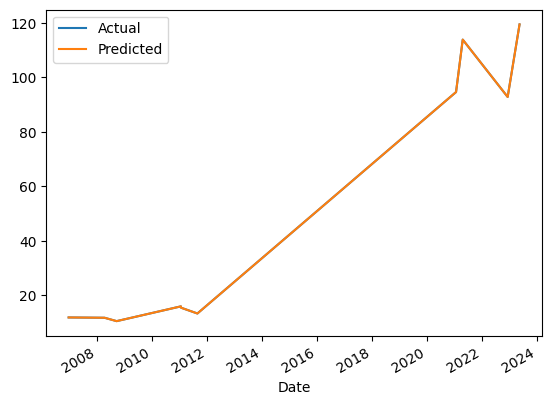

In [109]:
df_compare.plot(kind='line')
# lập biểu đồ độ để dễ đánh giá

### <font color = "green"> Ta thấy mô hình quá tốt<font>

# <font color="red">5:Lưu mô hình</font>

Ta đang triển khai mô hình trong biến model

In [110]:
import pickle
# Tải mô hình từ file
with open('../Model_data/Google.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [111]:
X_test

array([[0.06157291, 0.06212273, 0.06212853, 0.06261022],
       [0.09178106, 0.09126331, 0.08832417, 0.08693279],
       [0.06283144, 0.06257737, 0.06196402, 0.06185609],
       ...,
       [0.08295265, 0.08216385, 0.08247873, 0.08122582],
       [0.03590805, 0.03564574, 0.03579922, 0.03500445],
       [0.17438432, 0.17432049, 0.17585604, 0.17433479]])